In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('ParisHousing.csv')
df

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1726,89,0,1,5,73133,7,6,2009,0,1,9311,1698,218,0,4,176425.9
9996,44403,29,1,1,12,34606,9,4,1990,0,1,9061,1742,230,0,0,4448474.0
9997,83841,3,0,0,69,80933,10,10,2005,1,1,8304,7730,345,1,9,8390030.5
9998,59036,70,0,0,96,55856,1,3,2010,0,1,2590,6174,339,1,4,5905107.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [6]:
df.isna().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [32]:
X = df.drop(['cityCode'], axis=1).values
y = df['price'].values

In [33]:
X

array([[7.5523000e+04, 3.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        7.0000000e+00, 7.5590815e+06],
       [8.0771000e+04, 3.9000000e+01, 1.0000000e+00, ..., 1.0000000e+00,
        2.0000000e+00, 8.0859895e+06],
       [5.5712000e+04, 5.8000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        9.0000000e+00, 5.5746421e+06],
       ...,
       [8.3841000e+04, 3.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        9.0000000e+00, 8.3900305e+06],
       [5.9036000e+04, 7.0000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        4.0000000e+00, 5.9051070e+06],
       [1.4400000e+03, 8.4000000e+01, 0.0000000e+00, ..., 1.0000000e+00,
        6.0000000e+00, 1.4670840e+05]])

In [34]:
y

array([7559081.5, 8085989.5, 5574642.1, ..., 8390030.5, 5905107. ,
        146708.4])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [36]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [37]:
y_pred

array([7964626.4 , 3712156.28, 8552237.38, ...,  542995.86, 2745952.5 ,
       5998545.24])

In [38]:
mean_squared_error(y_pred, y_test) ** (1/2)

1596.1013653863931

In [39]:
from sklearn.metrics import mean_absolute_error

In [40]:
mean_absolute_error(y_pred, y_test)

1226.9284239999865

In [41]:
test = pd.DataFrame(y_test, columns=['y_test'])

In [42]:
test['y_pred'] = y_pred

In [43]:
test

,y_test,y_pred
0,7964369.6,7964626.40
1,3713548.9,3712156.28
2,8553019.2,8552237.38
3,6428666.2,6431599.54
4,6465184.9,6465280.52
...,...,...
2495,5161447.9,5160783.24
2496,7248658.3,7249065.82
2497,541400.2,542995.86
2498,2744762.0,2745952.50


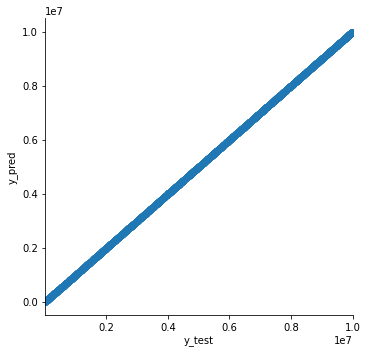

In [44]:
sns.lmplot(data=test, x='y_test', y='y_pred')

In [45]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

In [46]:
y_pred = linear.predict(X_test)

In [47]:
mean_squared_error(y_pred, y_test)

4.3342874921525853e-16

In [48]:
mean_absolute_error(y_pred, y_test)

2.0805482199648397e-08

In [49]:
test['y_test'] = y_test
test['y_pred'] = y_pred

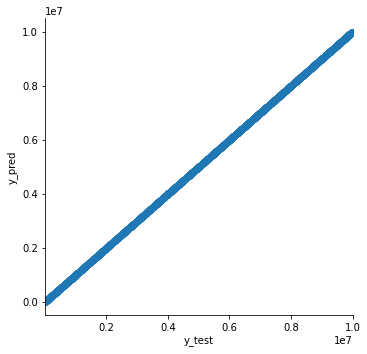

In [50]:
sns.lmplot(data=test, x='y_test', y='y_pred')